<a href="https://colab.research.google.com/github/NATANAlways/DeepLearning_sample_project1/blob/main/mnist_hand_written_number__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading mnist data from keras.datasets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Training data = 60, 000 images

Test data = 10, 000 images



Image dimensions -> 28 * 28

Grayscale Image -> 1 channel

In [5]:
# printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


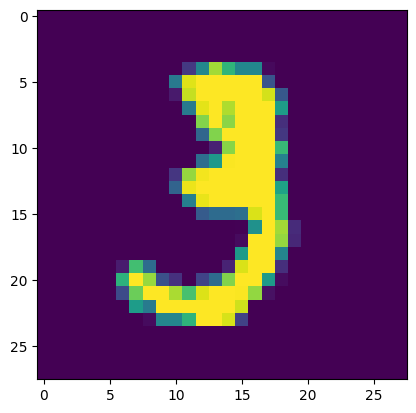

In [7]:
# displaying the image
plt.imshow(x_train[10])

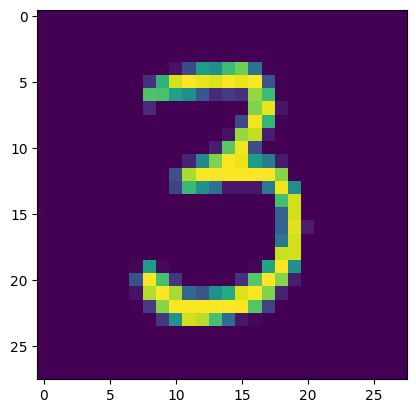

3


In [8]:
plt.imshow(x_train[50])
plt.show()

# print the corresponding label
print(y_train[50])

Image Labels

In [9]:
print(x_train.shape, y_test.shape)

(60000, 28, 28) (10000,)


In [10]:
# unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
# unique values in y_train
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


can use this lables as such apply one hot encoding

all image have same dimensions in this dataset, if not , we have to resize all the images to a common dimension

In [12]:
# scaling the values
x_train = x_train / 255
x_test = x_test / 255


In [14]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a neural network


In [15]:
#  setting up the layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# compiling the neural network A+
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# training the neural network
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8484 - loss: 0.5144
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9525 - loss: 0.1572
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9647 - loss: 0.1136
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9729 - loss: 0.0887
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9786 - loss: 0.0712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0594
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9851 - loss: 0.0507
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9881 - loss: 0.0424
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0368
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9895 - loss: 0.0325


Training data accuracy = 98.95 %

Accuracy on Test data

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1368
0.9710999727249146


Test data accuracy = 97.1 %

In [19]:
print(x_test.shape)

(10000, 28, 28)


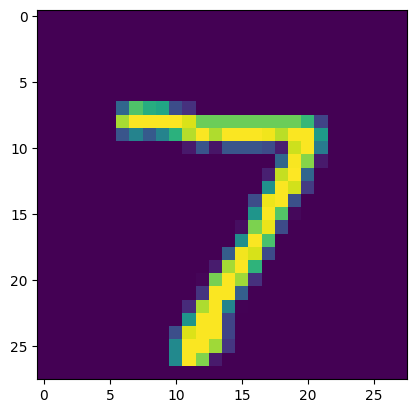

In [20]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [21]:
print(y_test[0])

7


In [22]:
y_predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [23]:
print(y_predict.shape)

(10000, 10)


In [24]:
print(y_predict[0])

[3.0991507e-01 1.4405249e-07 2.8304952e-01 8.5616416e-01 1.9298005e-09
 2.4681566e-03 4.1515927e-12 9.9998307e-01 1.9273970e-01 9.9182999e-01]


model.predict() gives the prediction probability of each class for that data point

In [26]:
# converting the prediction probability through class labels
label_for_first_image = np.argmax(y_predict[0])
print(label_for_first_image)

7


In [28]:
# converting the prediction probability for class label for all test data points
y_predict_labels = [np.argmax(i) for i in y_predict]
print(y_predict_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test ---> true labels

y_predict_labels ---> predicted labels

Confusion Matrix

In [29]:
conf_mat = confusion_matrix(y_test, y_predict_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 965    0    1    1    1    0    4    0    4    4]
 [   0 1113    2    4    0    1    2    1   12    0]
 [   4    1  999    8    2    0    3    4   11    0]
 [   2    0    1  987    0    4    2    5    6    3]
 [   0    1   10    0  954    1    6    3    5    2]
 [   4    0    0   20    0  851    5    1    8    3]
 [   4    1    1    1    7    5  930    1    8    0]
 [   1    0   12    3    1    0    0  997    5    9]
 [   1    0    4   10    2    2    1    1  951    2]
 [   1    2    0    7   17    2    1    6    9  964]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

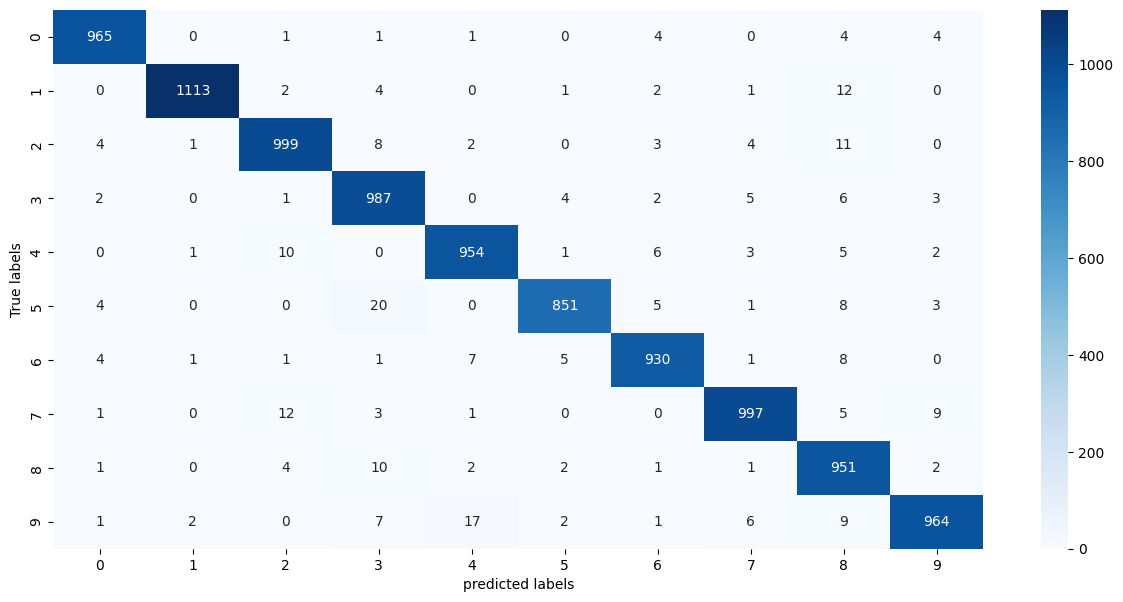

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('predicted labels')

Building a predictive system

In [32]:
input_image_path = 'number.jpg'

In [33]:
input_image = cv2.imread(input_image_path)

In [34]:
type(input_image)

numpy.ndarray

In [35]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


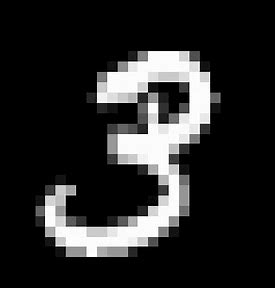

In [38]:
cv2_imshow(input_image)


In [39]:
input_image.shape

(288, 275, 3)

In [42]:
img_grey = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [43]:
img_grey.shape

(288, 275)

In [44]:
img_resize = cv2.resize(img_grey, (28,28))

In [45]:
img_resize.shape

(28, 28)

In [46]:
cv2_imshow(img_resize)

In [47]:
img_resize = img_resize / 255

In [48]:
img_reshaped = np.reshape(img_resize, [1,28,28])
type(img_reshaped)

numpy.ndarray

In [49]:
input_prediction = model.predict(img_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[3.7574074e-10 1.7920049e-06 9.6765580e-06 1.0000000e+00 1.9044821e-09
  7.9379028e-01 3.1308417e-19 1.8818226e-10 9.9952590e-01 9.9078876e-01]]


In [50]:
input_pred_label = np.argmax(input_prediction)

In [51]:
print(input_pred_label)

3


In [52]:
print(type(input_pred_label))

<class 'numpy.int64'>


Predictive SYSTEM

Path of the image: /content/number.jpg


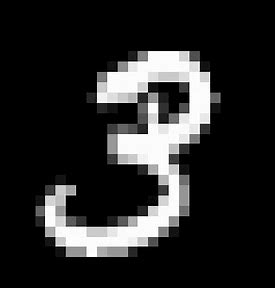

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Hand written Digit is recognized as  3


In [58]:
input_img_path = input("Path of the image: ")
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)
gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
input_img_resize = cv2.resize(gray_img, (28,28))
input_img_resize = input_img_resize / 255
input_img_reshape  = input_img_resize.reshape(1,28,28)
input_prediction = model.predict(input_img_reshape)
input_pred_label = np.argmax(input_prediction)
print("Hand written Digit is recognized as ", input_pred_label)


